<a href="https://colab.research.google.com/github/somyaSarathi/ML-Assignments/blob/main/baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Somya Sarathi Samal**
### **RA1911031010117**
**CSE - IT (L1)**

In [ ]:
#importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving baseball - baseball.csv to baseball - baseball (4).csv


In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['baseball - baseball.csv']))

### **Pre-Processing**

In [ ]:
data.shape

(1232, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [ ]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [ ]:
data['RN']=data['RA']-data['RS']

In [ ]:
data.shape

(1232, 16)

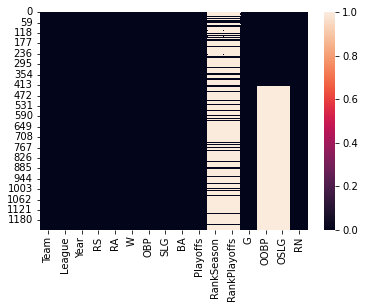

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data['RankSeason'].value_counts()

2.0    53
1.0    52
4.0    44
3.0    44
5.0    21
6.0    20
7.0     9
8.0     1
Name: RankSeason, dtype: int64

In [ ]:
data['RankPlayoffs'].value_counts()

3.0    80
4.0    68
2.0    47
1.0    47
5.0     2
Name: RankPlayoffs, dtype: int64

In [ ]:
data['OOBP'].value_counts()

0.314    13
0.329    13
0.327    13
0.336    12
0.342    12
         ..
0.367     1
0.364     1
0.304     1
0.296     1
0.371     1
Name: OOBP, Length: 72, dtype: int64

In [ ]:
data['OSLG'].value_counts()

0.431    16
0.423    13
0.422    10
0.398     9
0.408     8
         ..
0.375     1
0.371     1
0.373     1
0.352     1
0.459     1
Name: OSLG, Length: 112, dtype: int64

In [ ]:
print(round((data['OOBP'].isnull().sum()/data.shape[0])*100,2))

65.91


In [ ]:
data.groupby('Year')
print(data)

     Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
0     ARI     NL  2012  734  688   81  0.328  0.418  0.259         0   
1     ATL     NL  2012  700  600   94  0.320  0.389  0.247         1   
2     BAL     AL  2012  712  705   93  0.311  0.417  0.247         1   
3     BOS     AL  2012  734  806   69  0.315  0.415  0.260         0   
4     CHC     NL  2012  613  759   61  0.302  0.378  0.240         0   
...   ...    ...   ...  ...  ...  ...    ...    ...    ...       ...   
1227  PHI     NL  1962  705  759   81  0.330  0.390  0.260         0   
1228  PIT     NL  1962  706  626   93  0.321  0.394  0.268         0   
1229  SFG     NL  1962  878  690  103  0.341  0.441  0.278         1   
1230  STL     NL  1962  774  664   84  0.335  0.394  0.271         0   
1231  WSA     AL  1962  599  716   60  0.308  0.373  0.250         0   

      RankSeason  RankPlayoffs    G   OOBP   OSLG   RN  
0            NaN           NaN  162  0.317  0.415  -46  
1            4.0     

In [ ]:
print(round((data['OSLG'].isnull().sum()/data.shape[0])*100,2))

65.91


In [ ]:
data['OSLG']=data['OSLG'].fillna(data['OSLG'].mode()[0])

In [ ]:
print(round((data['RankSeason'].isnull().sum()/data.shape[0])*100,2))

80.19


In [ ]:
print(round((data['RankPlayoffs'].isnull().sum()/data.shape[0])*100,2))

80.19


In [ ]:
data.drop(columns=['OOBP','RankSeason','RankPlayoffs'],axis=1,inplace=True)

In [ ]:
data.shape

(1232, 13)

In [ ]:
data1=data.loc[data['Year']<2002]

In [ ]:
data1.shape

(902, 13)

In [ ]:
data1.isnull().sum()

Team        0
League      0
Year        0
RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
G           0
OSLG        0
RN          0
dtype: int64

### **Visulaizations**

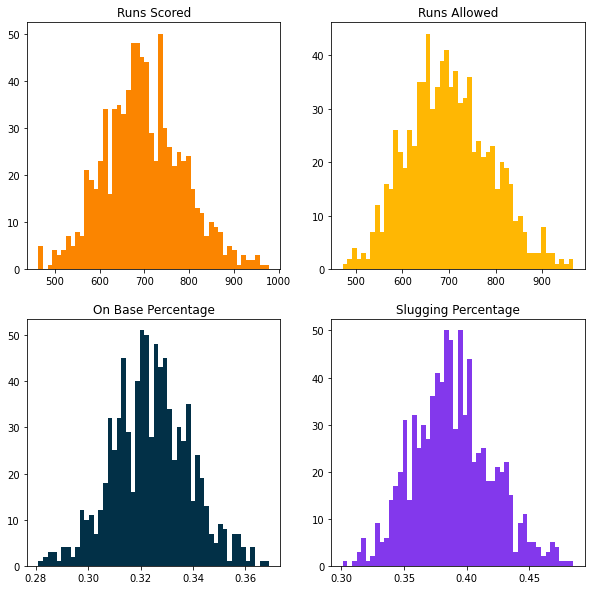

In [ ]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(data1.RS,bins = 50,color='#fb8500')
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(data1.RA,bins = 50,color='#ffb703')
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(data1.OBP,bins = 50, color='#023047')
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(data1.SLG,bins = 50, color='#8338ec')
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

In [ ]:
data1_1 =data1.loc[data['Playoffs']==1]
data1_0 =data1.loc[data['Playoffs']==0]

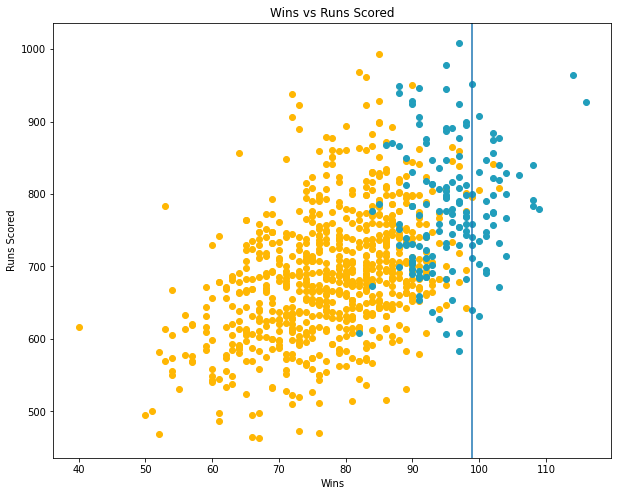

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=data1_0.W,y = data1_0.RS,c="#ffb703")
plt.scatter(x=data1_1.W,y = data1_1.RS,c="#219ebc")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

In [ ]:
features=data1.columns.tolist()
print(features)

['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'G', 'OSLG', 'RN']


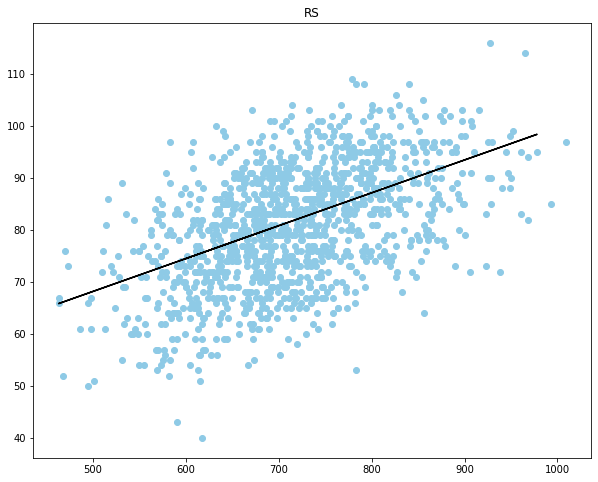

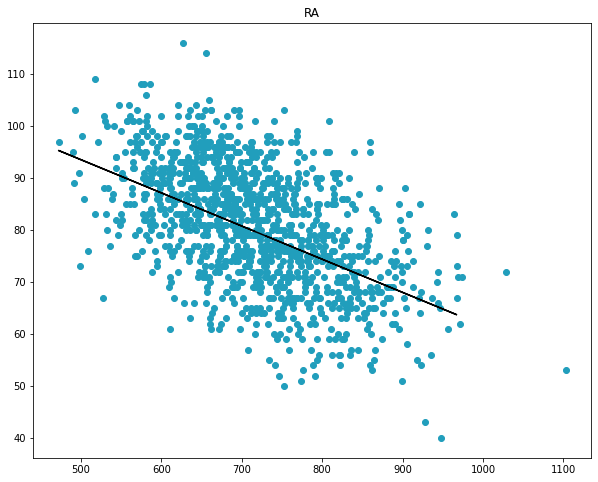

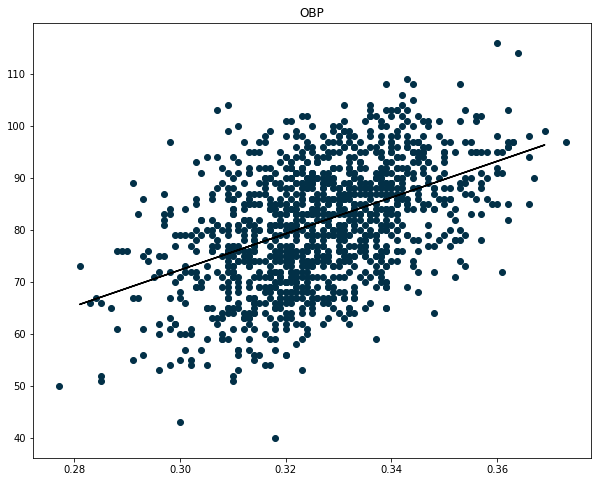

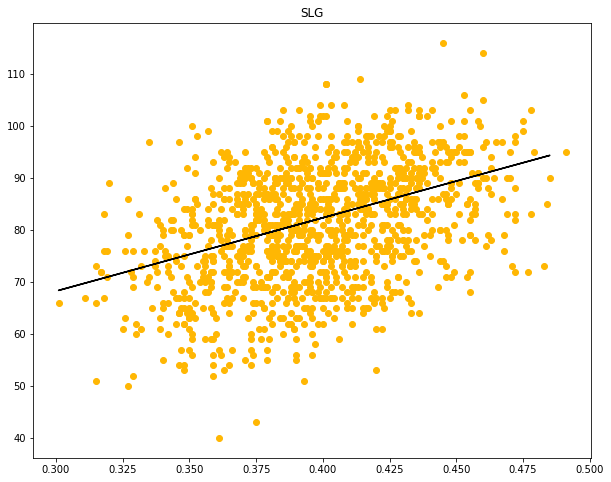

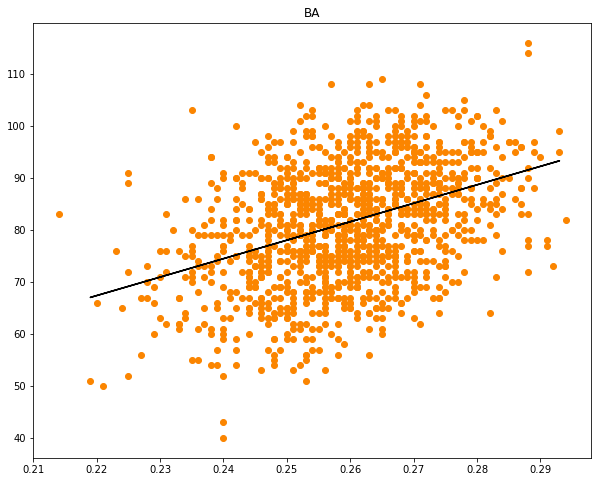

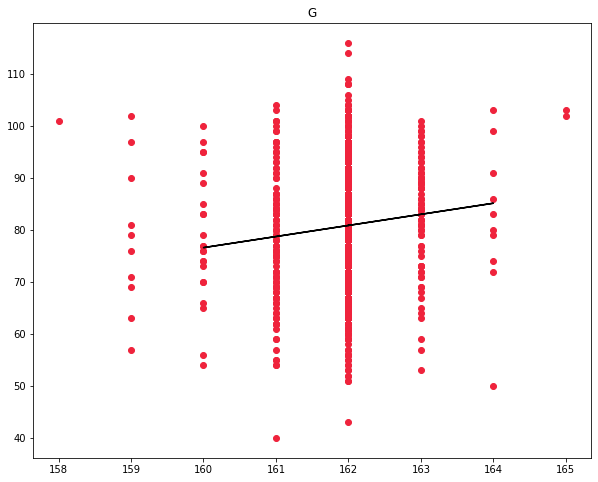

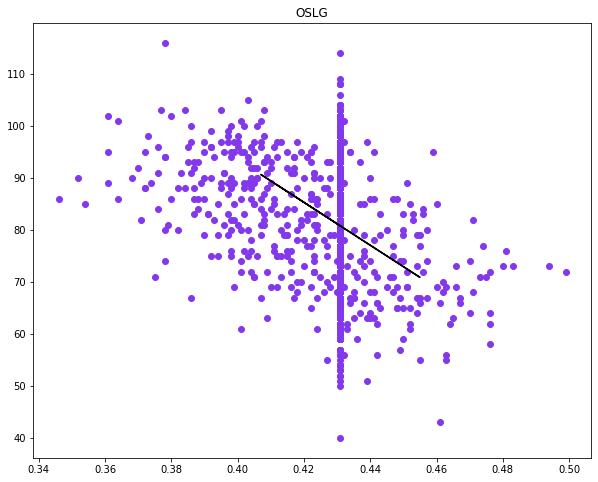

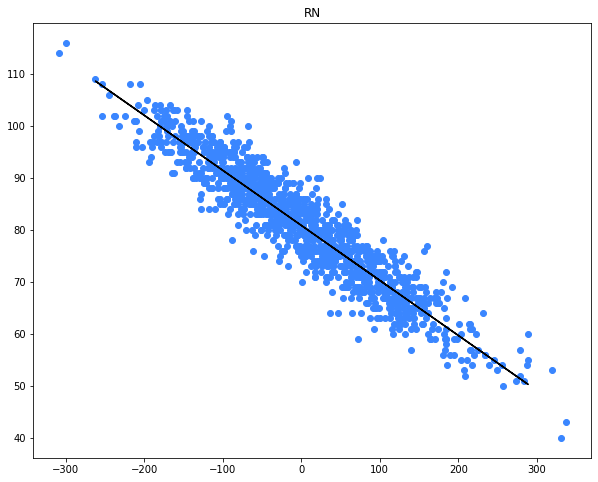

In [ ]:
y=data1['W']
num_feature=data1._get_numeric_data().columns.tolist()
num_feature.remove("Playoffs")
num_feature.remove("Year")
color=['#8ecae6','#219ebc','#023047','#ffb703','#fb8500','#ef233c','#8338ec','#3a86ff']
j=0
for i in num_feature:
  if (i!='W'):
    x=data1[i]
    slope,intercept=np.polyfit(x, y, 1)
    abline_values = [slope * i + intercept for i in x]
    plt.figure(figsize=(10,8))
    plt.scatter(data[i],data['W'],color=color[j])
    plt.plot(x, abline_values, 'black')
    plt.title(i)
    plt.show()
    j+=1

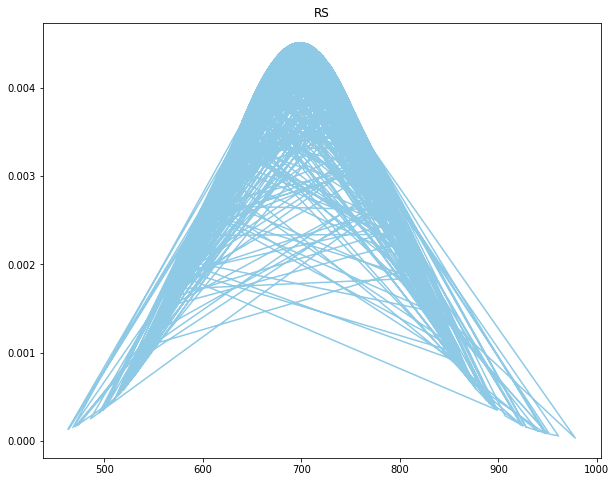

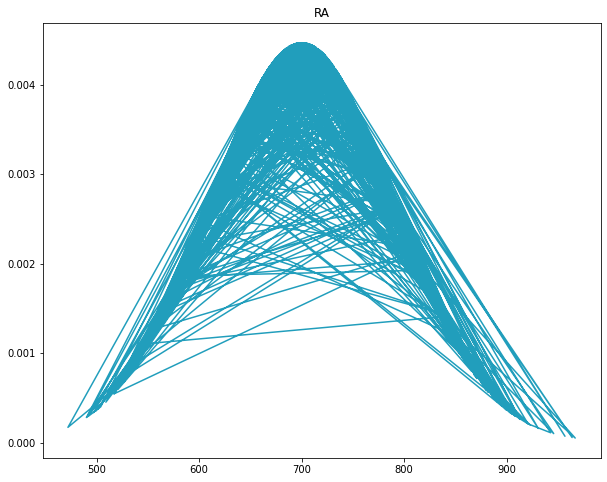

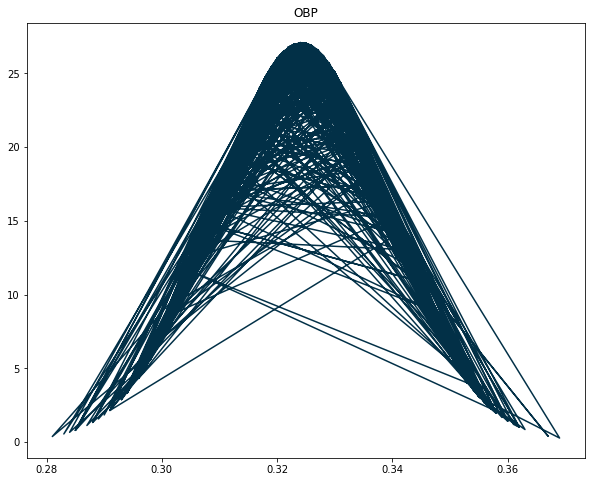

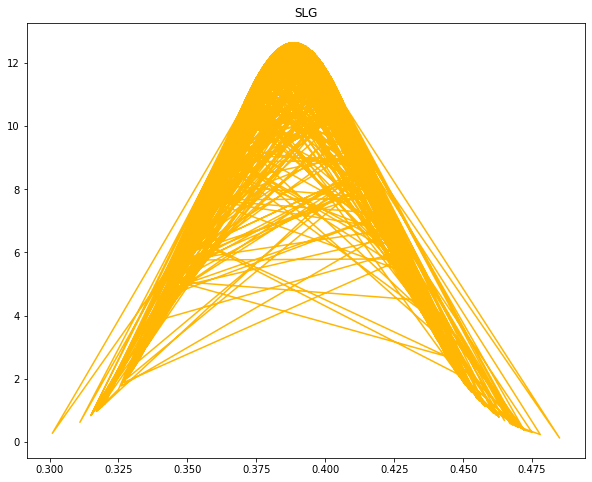

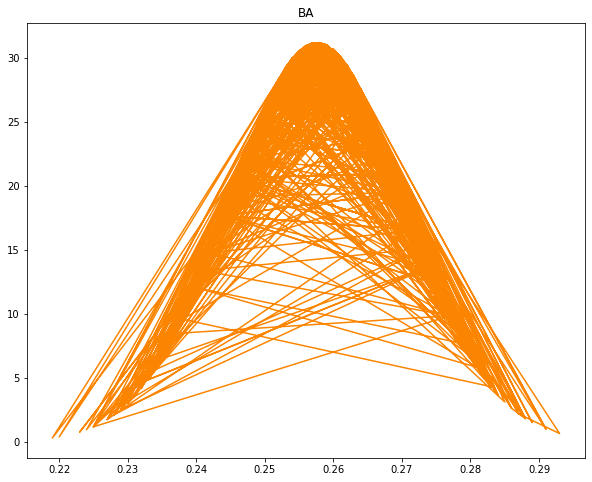

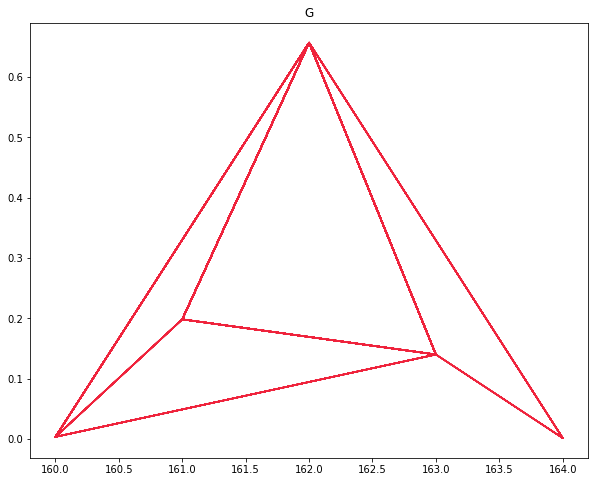

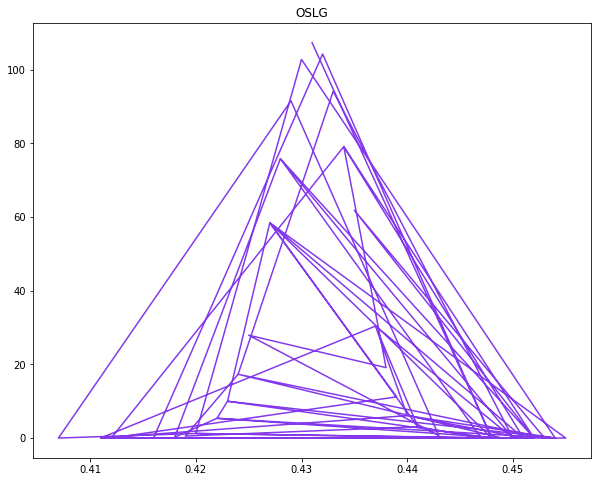

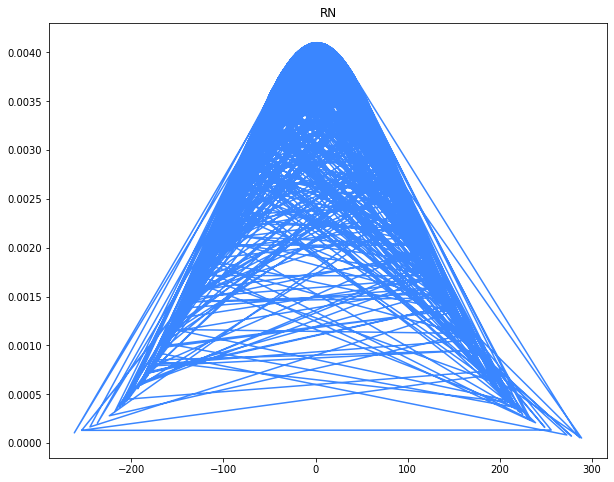

In [ ]:
import statistics
from scipy.stats import norm
y=data1['W']
color=['#8ecae6','#219ebc','#023047','#ffb703','#fb8500','#ef233c','#8338ec','#3a86ff']
j=0
for i in num_feature:
  if (i!='W'):
    x=data1[i]
    plt.figure(figsize=(10,8))
    plt.plot(x,norm.pdf(x,statistics.mean(x),statistics.stdev(x)),color=color[j])
    plt.title(i)
    plt.show()
    j+=1

In [ ]:
##hence the data is not skewed.
print(data1.head(5))
data1=data1.reset_index(drop=True)
print(data1.head(5))

    Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs    G  \
330  ANA     AL  2001  691  730  75  0.327  0.405  0.261         0  162   
331  ARI     NL  2001  818  677  92  0.341  0.442  0.267         1  162   
332  ATL     NL  2001  729  643  88  0.324  0.412  0.260         1  162   
333  BAL     AL  2001  687  829  63  0.319  0.380  0.248         0  162   
334  BOS     AL  2001  772  745  82  0.334  0.439  0.266         0  161   

      OSLG   RN  
330  0.412   39  
331  0.404 -141  
332  0.384  -86  
333  0.439  142  
334  0.393  -27  
  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs    G   OSLG  \
0  ANA     AL  2001  691  730  75  0.327  0.405  0.261         0  162  0.412   
1  ARI     NL  2001  818  677  92  0.341  0.442  0.267         1  162  0.404   
2  ATL     NL  2001  729  643  88  0.324  0.412  0.260         1  162  0.384   
3  BAL     AL  2001  687  829  63  0.319  0.380  0.248         0  162  0.439   
4  BOS     AL  2001  772  745  82  0.334 

In [ ]:
# ##removing outliers
# indexes=[]
# for i in num_feature:
#   upper=statistics.mean(data[i])+3*statistics.stdev(data[i])
#   lower=statistics.mean(data[i])-3*statistics.stdev(data[i])
#   feature=data[i]
#   for j in range(len(feature)):
#     if (feature[j]<lower or feature[j]>upper):
#       # indexes.append(j)
#       k=[]
#       k.append(j)
#       data1.drop(k,axis=0,inplace=True)

#compute the upper and lower for each column
upper=[]
lower=[]
for i in range(len(num_feature)):
  col=num_feature[i]
  u=statistics.mean(data1[col])+3*statistics.stdev(data1[col])
  l=statistics.mean(data1[col])-3*statistics.stdev(data1[col])
  upper.append(u)
  lower.append(l)
print(lower)
print(upper)

indexes=[]
for i in range(data1.shape[0]):
  for j in range(len(num_feature)):
    col=num_feature[j]
    g=data1.iloc[i][col]
    if(g<lower[j] or g>upper[j]):
      indexes.append(i)
      break
    else:
      continue
print(data1.shape)

[423.8655755927766, 422.4570113456966, 46.671103017010324, 0.27878731403250323, 0.29108375339858306, 0.2183558944423976, 159.800491880211, 0.4069196112660248, -303.56605294674307]
[983.7530496843851, 985.1616139314651, 115.09164642866594, 0.371135080645989, 0.4897410803042994, 0.297950092253833, 164.01325534817036, 0.45537972354550504, 303.56605294674307]
(902, 13)


In [ ]:
data1.drop(indexes,axis=0,inplace=True)
print(data1.shape)

(852, 13)


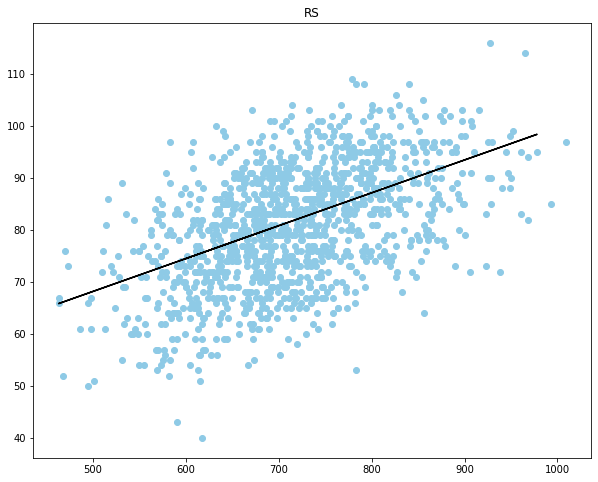

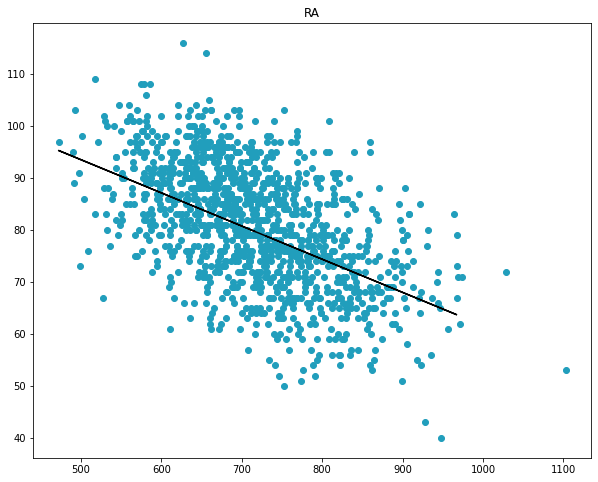

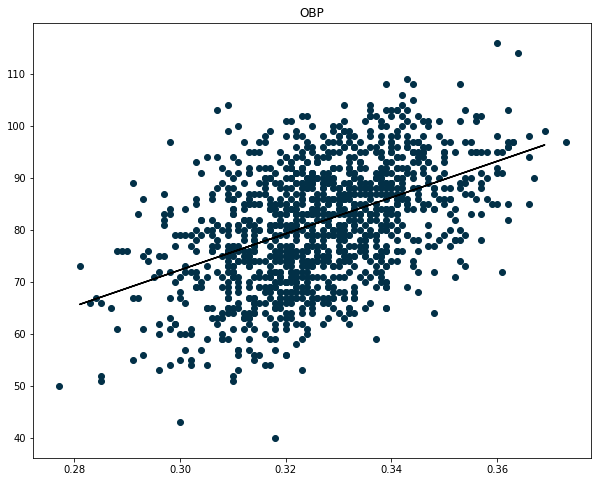

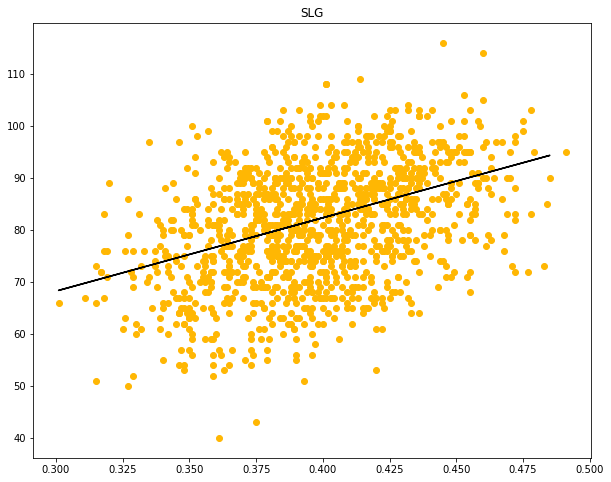

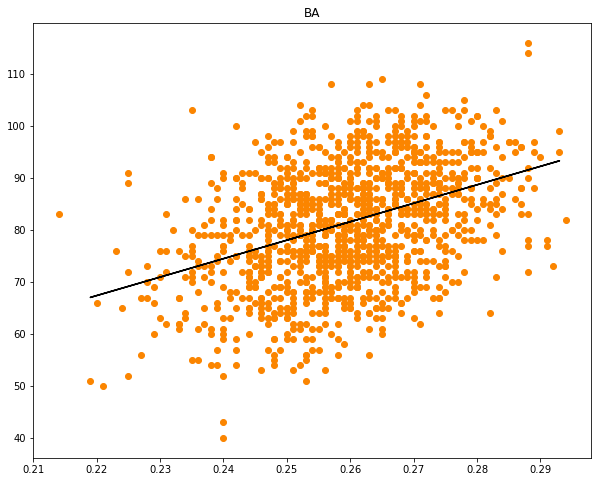

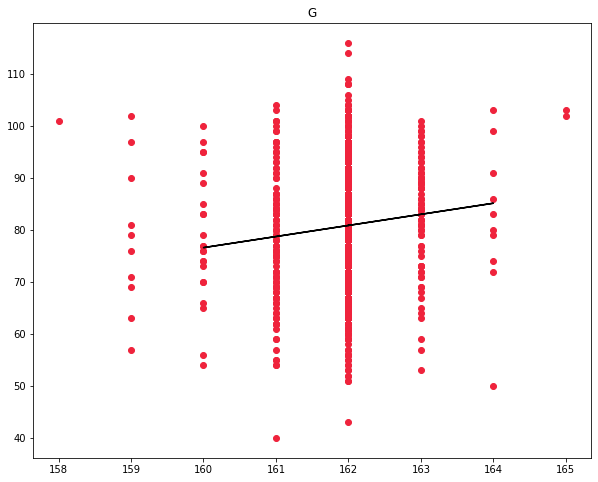

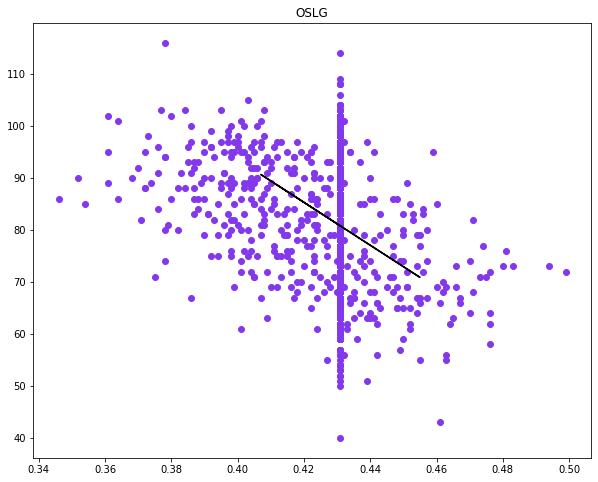

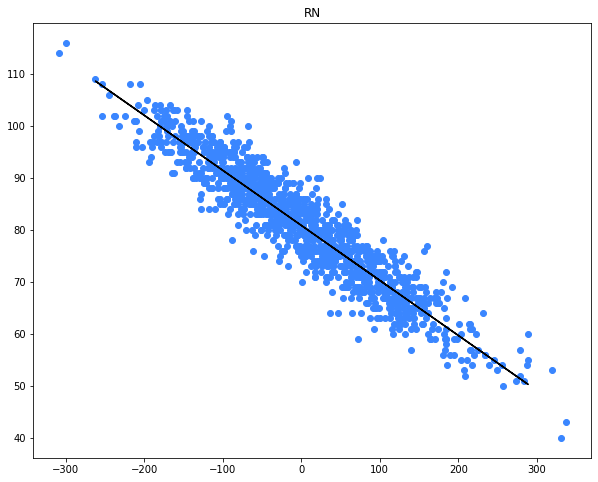

In [ ]:
y=data1['W']
color=['#8ecae6','#219ebc','#023047','#ffb703','#fb8500','#ef233c','#8338ec','#3a86ff']
j=0
for i in num_feature:
  if (i!='W'):
    x=data1[i]
    slope,intercept=np.polyfit(x, y, 1)
    abline_values = [slope * i + intercept for i in x]
    plt.figure(figsize=(10,8))
    plt.scatter(data[i],data['W'],color=color[j])
    plt.plot(x, abline_values, 'black')
    plt.title(i)
    plt.show()
    j+=1

In [ ]:
##one hot encoding
y1=pd.get_dummies(data1['Team'], prefix='Team')
y2=pd.get_dummies(data1['League'], prefix='League')
data1.drop(columns=['Team','League'],axis=1,inplace=True)

In [ ]:
data2=pd.concat([data1,y1,y2], axis=1)

In [ ]:
print(data2.head(5))

   Year   RS   RA   W    OBP    SLG     BA  Playoffs    G   OSLG  ...  \
0  2001  691  730  75  0.327  0.405  0.261         0  162  0.412  ...   
3  2001  687  829  63  0.319  0.380  0.248         0  162  0.439  ...   
6  2001  798  795  83  0.334  0.451  0.268         0  162  0.427  ...   
7  2001  735  850  66  0.324  0.419  0.262         0  162  0.455  ...   
8  2001  897  821  91  0.350  0.458  0.278         1  162  0.417  ...   

   Team_SEA  Team_SEP  Team_SFG  Team_STL  Team_TBD  Team_TEX  Team_TOR  \
0         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   

   Team_WSA  League_AL  League_NL  
0         0          1          0  
3         0          1          0  
6 

### **Models**

In [ ]:
from sklearn.model_selection import train_test_split
y=data2['W']
x=data2.drop(columns=['W'],axis=1)
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size = 0.4,shuffle=True, random_state = 42)

In [ ]:
x_train

,Year,RS,RA,OBP,SLG,BA,Playoffs,G,OSLG,RN,...,Team_SEA,Team_SEP,Team_SFG,Team_STL,Team_TBD,Team_TEX,Team_TOR,Team_WSA,League_AL,League_NL
840,1965,707,674,0.314,0.371,0.254,0,162,0.431,-33,...,0,0,0,1,0,0,0,0,0,1
736,1970,744,747,0.331,0.379,0.263,0,162,0.431,3,...,0,0,0,1,0,0,0,0,0,1
565,1978,600,657,0.303,0.358,0.249,0,162,0.431,57,...,0,0,0,1,0,0,0,0,0,1
126,1997,651,764,0.321,0.389,0.253,0,162,0.431,113,...,0,0,0,0,0,0,0,0,0,1
17,2001,670,812,0.319,0.396,0.253,0,162,0.441,142,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1998,874,620,0.356,0.436,0.280,1,162,0.431,-254,...,0,0,0,0,0,0,0,0,0,1
138,1997,891,688,0.362,0.436,0.287,1,162,0.431,-203,...,0,0,0,0,0,0,0,0,1,0
304,1989,699,600,0.316,0.390,0.250,1,162,0.431,-99,...,0,0,1,0,0,0,0,0,0,1
469,1982,786,710,0.337,0.413,0.273,0,162,0.431,-76,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Extracting our variables from the dataframe.
x = data2[['OBP','SLG','BA']].values
y = data2[['RS']].values
# Calling our model object.
RS_model = LinearRegression()
# Fitting the model.
RS_model.fit(x,y)
# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

[-773.77273332]
[[2924.01937911 1645.01781119 -445.33603592]]


In [ ]:
# Extracting our variables from the dataframe.
x = data2[['OBP','SLG']].values
y = data2[['RS']].values
# Calling our model object.
RS_model = LinearRegression()
# Fitting the model.
RS_model.fit(x,y)
# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

[-793.37834505]
[[2708.85577046 1579.7440258 ]]


In [ ]:
predicted=RS_model.predict(x_test[['OBP','SLG']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test,predicted))

In [ ]:
print(rmse)

622.9056636897128


**As in the Graphical Representation we can observe a straight line which clearly depicts that a linear relation is observed between the input features and the target value. Hence Linear Regression is a Well Suited Model.**